# Simple Spherical Harmonic Expansions

This script demonstrates how to expand and analyse global data on the sphere using spherical harmonic functions.

In [1]:
%matplotlib inline
from __future__ import print_function # only necessary if using Python 2.x

import matplotlib.pyplot as plt
import numpy as np

In this example, we will use the topography of Earth that is provided in the example directory.

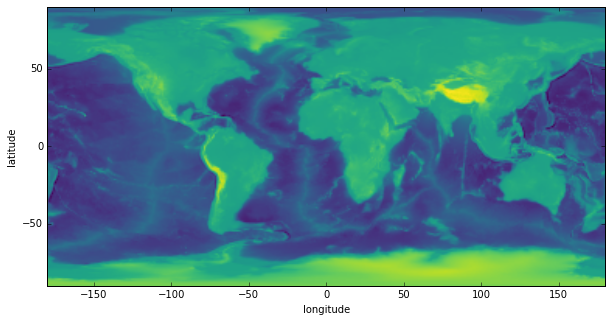

In [2]:
# Read the gridded Earth topography data from the example directory.
infile = '../ExampleDataFiles/topo.dat.gz'
topo = np.loadtxt(infile)

# Plot the data using matplotlib.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(topo, extent=(-180, 180, -90, 90), cmap='viridis')
ax.set(xlabel='longitude', ylabel='latitude');

## Compute the power spectrum

Power spectra show how the variance of the function is distributed as a function of spherical harmonic degree. Concentration of energy (power) in spherical harmonics with a particular wavelength can give hints about the scales of the features.

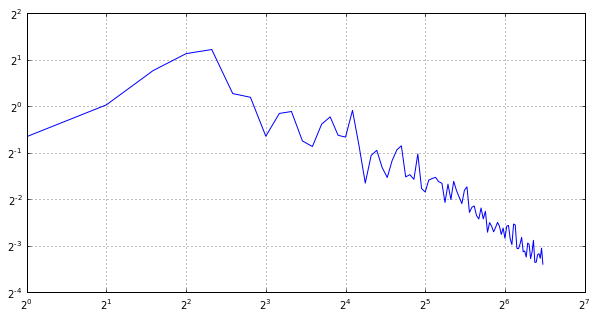

In [3]:
# Import the required functions. Alternatively, and for convenience,
# these could all be imported from the submodule pyshtools.shtools instead.
from pyshtools.expand import SHExpandDH;
from pyshtools.shtools import SHPowerSpectrumDensity;

coeffs = SHExpandDH(topo, sampling=2)
nl = coeffs.shape[1]
ls = np.arange(nl)

# A spherical harmonic power spectrum can be calculated using different
# conventions. SHTOOLS defines the power spectrum density as the power per
# coefficent, where the power is assumed to be distributed isostropically
# among all the angular orders at degree l. This is analogous to the power
# per kx and ky in Fourier analyses of 2D functions.
power_per_lm = SHPowerSpectrumDensity(coeffs)

# The power per degree l is somewhat equivalent to the power at a given
# magnitude |k| in the 2D Fourier domain. This can be calculated using the 
# function SHPowerSpectrum(coeffs), but it is equivalent to multiplying
# the power per coefficient by (2*l + 1).
power_per_l = power_per_lm * (2 * ls + 1)

# The power per log(l) 'band power' corresponds to the full coefficient
# energy in a logarithmic band (e.g., a factor 2) and is useful to analyse
# dominant scales. It is connected to localized, as opposed to standing
# wave, energy and is thus appropriate when looking at the variance spectrum
# of Earth's topography.
power_per_logl = np.log(2) * ls * power_per_l

# Plot the band power.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(ls, power_per_logl)
ax.set_yscale('log', basey=2)
ax.set_xscale('log', basex=2)
ax.grid()

## Simple Filtering

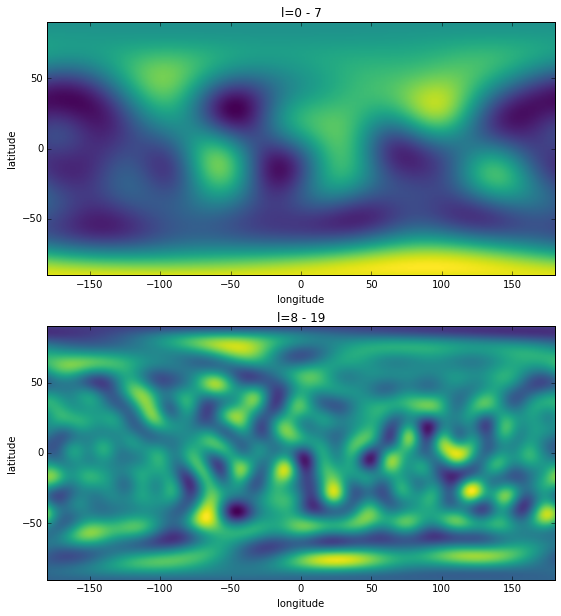

In [4]:
from pyshtools.expand import MakeGridDH;

# A global dataset can be filtered isostropically by multiplying
# the spherical harmonic coefficients by a degree-dependent filter.
# We demonstrate this by setting the coefficients greater or equal
# to degree 8 equal to zero.
coeffs_filtered = coeffs.copy()
lmax = 8
coeffs_filtered[:, lmax:, :] = 0.

topo_filtered = MakeGridDH(coeffs_filtered, sampling=2)

# Next, we bandpass filter the data to only retain spherical harmonic
# coefficients between 8 <= l < 20.
coeffs_filtered2 = coeffs.copy()
lmin, lmax = 8, 20
coeffs_filtered2[:, :lmin, :] = 0.
coeffs_filtered2[:, lmax:, :] = 0.

topo_filtered2 = MakeGridDH(coeffs_filtered2, sampling=2)

# Plot the filtered data.
fig, (row1, row2) = plt.subplots(2, 1, figsize=(10, 10))
row1.imshow(topo_filtered, extent=(-180, 180, -90, 90), cmap='viridis')
row1.set(xlabel='longitude', ylabel='latitude', title='l=0 - 7');
row2.imshow(topo_filtered2, extent=(-180, 180, -90, 90), cmap='viridis')
row2.set(xlabel='longitude', ylabel='latitude', title='l=8 - 19');